In [81]:
import pandas as pd

# 엑셀 파일 불러오기
file_path = r"C:\Users\minsu\Desktop\금빅데 자료.txt"
df = pd.read_csv(file_path, delimiter='\t', encoding='euc-kr')

# '구분' 열을 인덱스로 설정
df.set_index('구분', inplace=True)
df.index=df.index.rename('date')
df.index = pd.to_datetime(df.index, format='%Y/%m')


# 열 이름 변경
df = df.rename(columns={df.columns[0]: "House_Loan_ratio"})
df = df.rename(columns={df.columns[1]: "Bank_House_Loan"})
df = df.rename(columns={df.columns[2]: "Cofix_ratio"})
df = df.rename(columns={df.columns[3]: "unemployment_rate"})
df = df.rename(columns={df.columns[4]: "mortgage_interest_index"})
df = df.rename(columns={df.columns[5]: "Household_consumption"})
df = df.rename(columns={df.columns[6]: "M2"})
df = df.rename(columns={df.columns[7]: "House_Consumer_Conference_index"})
df = df.rename(columns={df.columns[8]: "Fixed Below Prime Lending Rate"})
df = df.rename(columns={df.columns[9]: "Credit_Card_Debt"})
df['Cofix_ratio']=df['Cofix_ratio']*0.01
# 변경된 데이터프레임 출력
df = df.dropna()
raw_data=df
print(df.head())

            House_Loan_ratio  Bank_House_Loan  Cofix_ratio  unemployment_rate  \
date                                                                            
2011-09-01          0.006875         379947.1       0.0370              0.030   
2011-12-01          0.006573         388415.9       0.0377              0.030   
2012-03-01          0.008536         389347.6       0.0372              0.037   
2012-06-01          0.008504         392841.2       0.0362              0.032   
2012-09-01          0.009511         393380.9       0.0318              0.029   

            mortgage_interest_index  Household_consumption         M2  \
date                                                                    
2011-09-01                     13.0               180145.4  1727997.3   
2011-12-01                      9.0               185432.1  1751458.4   
2012-03-01                     21.0               184293.4  1782765.5   
2012-06-01                     15.0               178780.3  1803812

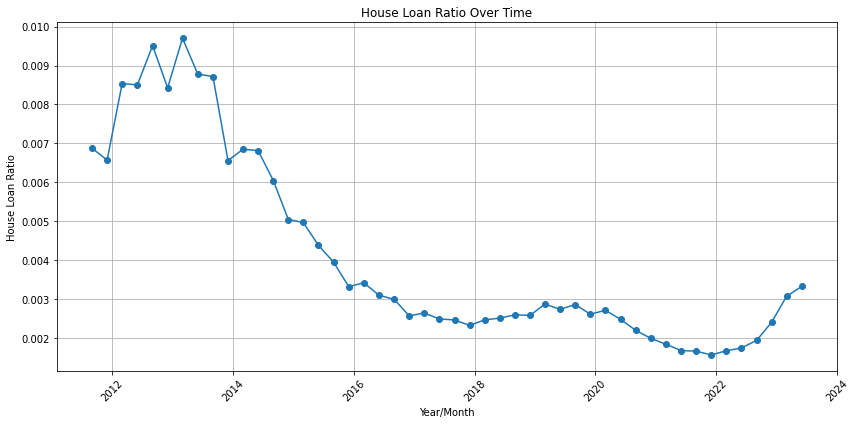

In [51]:
import matplotlib.pyplot as plt

# 'House_Loan_ratio' 열의 시계열 그래프 그리기
plt.figure(figsize=(12, 6))  # 그래프 크기 설정
plt.plot(df.index, df['House_Loan_ratio'], marker='o', linestyle='-')
plt.title('House Loan Ratio Over Time')  # 그래프 제목
plt.xlabel('Year/Month')  # x축 레이블
plt.ylabel('House Loan Ratio')  # y축 레이블
plt.grid(True)  # 그리드 표시
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()  # 그래프 깔끔하게 정리

plt.show()  # 그래프 표시

In [53]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from tabulate import tabulate

def add_stars(p_value):
    if p_value < 0.01:
        return f"{p_value:.4f} **"
    elif p_value < 0.05:
        return f"{p_value:.4f} *"
    elif p_value < 0.1:
        return f"{p_value:.4f}"
    else:
        return f"{p_value:.4f}"


adf_results = []
A=[0,0,0,0,0,0,0,0,0]
for i in range(1, 10):
    column_name = df.columns[i]
    adf_test = sm.tsa.adfuller(df[column_name], autolag='AIC')
    result = {
        "Variable": column_name,
        "ADF Statistic": adf_test[0],
        "P-Value": add_stars(adf_test[1]),
    }
    adf_results.append(result)

    # 검정 결과 해석
    if adf_test[1] <= 0.05:
        print(f'ADF 검정:{column_name} 시계열 데이터는 정상성을 가집니다. (단위근 없음)')

    else:
        print(f'ADF 검정:{column_name} 시계열 데이터는 비정상성을 가집니다. (단위근 있음)')
        A[i-1]=A[i-1]+1

# Convert the results to a DataFrame
results_df = pd.DataFrame(adf_results)

# Print the results as a table
print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))


ADF 검정:Bank_House_Loan 시계열 데이터는 비정상성을 가집니다. (단위근 있음)
ADF 검정:Cofix_ratio 시계열 데이터는 비정상성을 가집니다. (단위근 있음)
ADF 검정:unemployment_rate 시계열 데이터는 비정상성을 가집니다. (단위근 있음)
ADF 검정:mortgage_interest_index 시계열 데이터는 비정상성을 가집니다. (단위근 있음)
ADF 검정:Household_consumption 시계열 데이터는 비정상성을 가집니다. (단위근 있음)
ADF 검정:M2 시계열 데이터는 비정상성을 가집니다. (단위근 있음)
ADF 검정:House_Consumer_Conference_index 시계열 데이터는 정상성을 가집니다. (단위근 없음)
ADF 검정:Fixed Below Prime Lending Rate 시계열 데이터는 정상성을 가집니다. (단위근 없음)
ADF 검정:Credit_Card_Debt 시계열 데이터는 비정상성을 가집니다. (단위근 있음)
+---------------------------------+---------------------+----------+
|            Variable             |    ADF Statistic    | P-Value  |
+---------------------------------+---------------------+----------+
|         Bank_House_Loan         | 0.26343411972297176 |  0.9756  |
|           Cofix_ratio           |  -1.98372990269071  |  0.2938  |
|        unemployment_rate        | -2.296711495885717  |  0.1730  |
|     mortgage_interest_index     | -1.1736079121491843 |  0.6848  |
|      Hous

In [54]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

for i in range (1,10):
    column_name=df.columns[i]
    if A[i-1]==1:
        df[f'{column_name}_diff']=df[df.columns[i]].diff()
        
df_diff=df.dropna()

B=[0,0,0,0,0,0,0]
result_table = []

for i in range (10,17):
    column_name = df_diff.columns[i]
    adf_test_diff1 = sm.tsa.adfuller(df_diff[column_name], autolag='AIC')
    result = {
        "Variable": column_name,
        "ADF Statistic": adf_test_diff1[0],
        "P-Value": add_stars(adf_test_diff1[1]),
    }
    result_table.append(result)

    # 검정 결과 해석
    if adf_test_diff1[1] <= 0.05:
        print(f'ADF 검정:{column_name} 시계열 데이터는 정상성을 가집니다. (단위근 없음)')

    else:
        print(f'ADF 검정:{column_name} 시계열 데이터는 비정상성을 가집니다. (단위근 있음)')
        B[i-10]=B[i-10]+1
        
# Convert the results to a DataFrame
results_df = pd.DataFrame(result_table)

# Print the results as a table
print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))

ADF 검정:Bank_House_Loan_diff 시계열 데이터는 정상성을 가집니다. (단위근 없음)
ADF 검정:Cofix_ratio_diff 시계열 데이터는 비정상성을 가집니다. (단위근 있음)
ADF 검정:unemployment_rate_diff 시계열 데이터는 정상성을 가집니다. (단위근 없음)
ADF 검정:mortgage_interest_index_diff 시계열 데이터는 정상성을 가집니다. (단위근 없음)
ADF 검정:Household_consumption_diff 시계열 데이터는 정상성을 가집니다. (단위근 없음)
ADF 검정:M2_diff 시계열 데이터는 정상성을 가집니다. (단위근 없음)
ADF 검정:Credit_Card_Debt_diff 시계열 데이터는 정상성을 가집니다. (단위근 없음)
+------------------------------+---------------------+-----------+
|           Variable           |    ADF Statistic    |  P-Value  |
+------------------------------+---------------------+-----------+
|     Bank_House_Loan_diff     | -4.524219457070087  | 0.0002 ** |
|       Cofix_ratio_diff       | -2.460697047851689  |  0.1253   |
|    unemployment_rate_diff    | -3.1569630263197785 | 0.0226 *  |
| mortgage_interest_index_diff | -8.336006231068685  | 0.0000 ** |
|  Household_consumption_diff  | -3.588853904688387  | 0.0060 ** |
|           M2_diff            | -3.286436593434505  | 0.0155 * 

In [55]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate


for i in range (10,17):
    column_name=df_diff.columns[i]
    if B[i-10]==1:
        df_diff[f'{column_name}_2']=df[df_diff.columns[i]].diff()
    
df_diff2=df_diff.dropna()

result_table = []

for i in range(17, len(df_diff2.columns)):
    column_name = df_diff2.columns[i]
    adf_test_diff2 = sm.tsa.adfuller(df_diff2[column_name], autolag='AIC')
    result = {
        "Variable": column_name,
        "ADF Statistic": adf_test_diff2[0],
        "P-Value": add_stars(adf_test_diff2[1]),
    }
    result_table.append(result)

    # 검정 결과 해석
    if adf_test_diff2[1] <= 0.05:
        print(f'ADF 검정:{column_name} 시계열 데이터는 정상성을 가집니다. (단위근 없음)')

    else:
        print(f'ADF 검정:{column_name} 시계열 데이터는 비정상성을 가집니다. (단위근 있음)')

        
# Convert the results to a DataFrame
results_df = pd.DataFrame(result_table)

# Print the results as a table
print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))
# House_Consumer_Conference_index, Fixed Below Prime Lending Rate, Bank_House_Loan_diff
# unemployment_rate_diff, mortgage_interest_index_diff, Household_consumption_diff
# M2_diff, Credit_Card_Debt_diff, Cofix_ratio_diff_2 이 정상성을 만족

ADF 검정:Cofix_ratio_diff_2 시계열 데이터는 정상성을 가집니다. (단위근 없음)
+--------------------+---------------------+----------+
|      Variable      |    ADF Statistic    | P-Value  |
+--------------------+---------------------+----------+
| Cofix_ratio_diff_2 | -2.9649992106239833 | 0.0383 * |
+--------------------+---------------------+----------+


<ipython-input-55-c118b95f9f68>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff[f'{column_name}_2']=df[df_diff.columns[i]].diff()


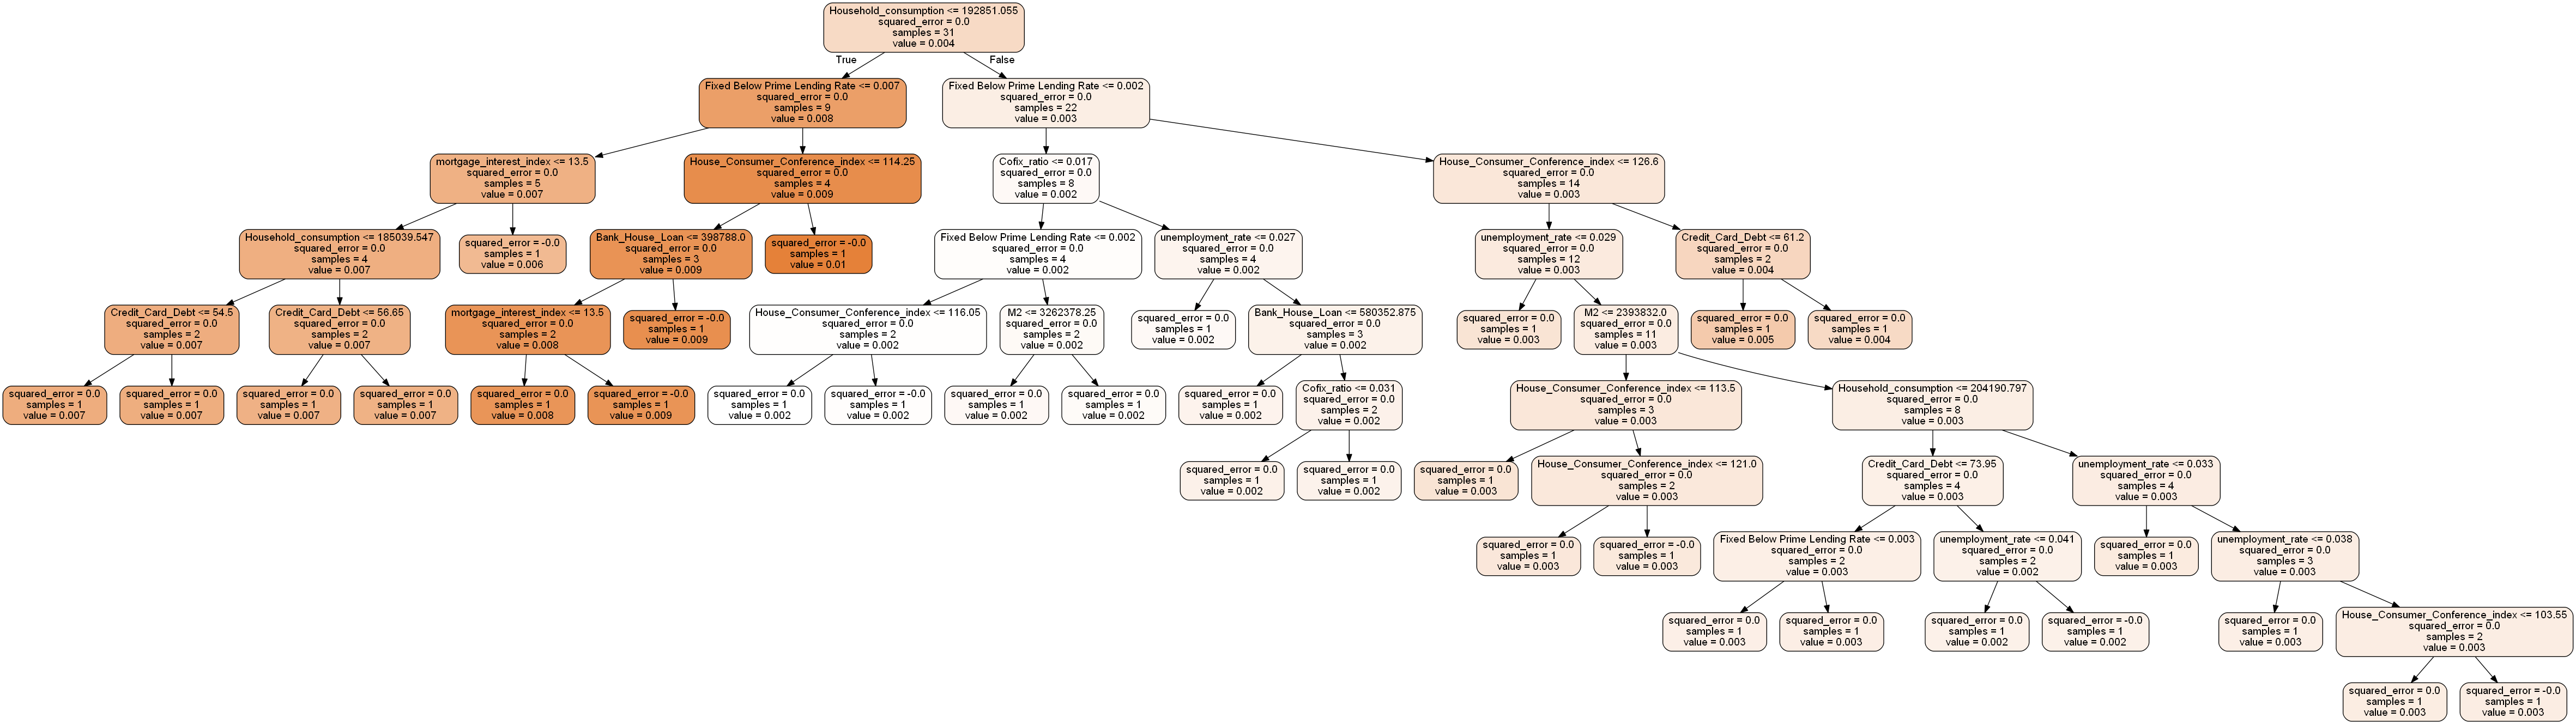

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# 데이터를 불러오거나 준비합니다.
# df = ...  # 데이터를 로드하거나 준비하는 코드를 추가하세요

# 결측값 및 무한값 처리
raw_data = raw_data.dropna()  # NaN 값을 가진 행을 제거합니다.
raw_data = raw_data.replace([np.inf, -np.inf], np.nan).dropna()  # Inf 값을 NaN으로 대체하고 NaN 값을 가진 행을 제거합니다.
df=raw_data
# 종속 변수 선택
y = raw_data['House_Loan_ratio']

# 독립 변수 선택
X = raw_data.drop(['House_Loan_ratio'], axis=1)

# 모델 생성 및 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X, y)

# 트리 시각화
tree = rf_model.estimators_[0]  # 첫 번째 트리를 선택
dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns, filled=True, rounded=True)
graph = graphviz.Source(dot_data)

# 이미지로 저장 (PNG 형식)
graph.render("rf_tree", format="png")

# 이미지 표시
Image("rf_tree.png")

# 가계소비, 고정이하여신비율, 주택가격심리지수 가 상위 노드에서 중요하게 작용함

In [47]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# 데이터를 불러오거나 준비합니다.
# df = ...  # 데이터를 로드하거나 준비하는 코드를 추가하세요

# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)

# 모델 학습
rf_model.fit(X, y)

# 특성 중요도 얻기
feature_importances = rf_model.feature_importances_

# 중요도가 높은 순서대로 정렬
sorted_indices = feature_importances.argsort()[::-1]

# 중요한 독립 변수 출력
print("중요한 독립 변수:")
for idx in sorted_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]}")

중요한 독립 변수:
Fixed Below Prime Lending Rate: 0.39496339296691874
M2: 0.21138302706537446
Credit_Card_Debt: 0.14989402069274219
Bank_House_Loan: 0.14527763263592616
Household_consumption: 0.08952050504315388
mortgage_interest_index: 0.0036899999364162273
Cofix_ratio: 0.0019393400608295678
House_Consumer_Conference_index: 0.0018514539289978932
unemployment_rate: 0.00148062766964083


In [83]:
df_normality=df_diff2[['House_Loan_ratio','House_Consumer_Conference_index',
                      'Fixed Below Prime Lending Rate',
                      'Bank_House_Loan_diff',
                      'unemployment_rate_diff',
                      'mortgage_interest_index_diff',
                      'Household_consumption_diff',
                      'M2_diff','Credit_Card_Debt_diff',
                      'Cofix_ratio_diff_2']]
print(df.head())
# House_Consumer_Conference_index, Fixed Below Prime Lending Rate, Bank_House_Loan_diff
# unemployment_rate_diff, mortgage_interest_index_diff, Household_consumption_diff
# M2_diff, Credit_Card_Debt_diff, Cofix_ratio_diff_2 이 정상성을 만족

            House_Loan_ratio  Bank_House_Loan  Cofix_ratio  unemployment_rate  \
date                                                                            
2011-09-01          0.006875         379947.1       0.0370              0.030   
2011-12-01          0.006573         388415.9       0.0377              0.030   
2012-03-01          0.008536         389347.6       0.0372              0.037   
2012-06-01          0.008504         392841.2       0.0362              0.032   
2012-09-01          0.009511         393380.9       0.0318              0.029   

            mortgage_interest_index  Household_consumption         M2  \
date                                                                    
2011-09-01                     13.0               180145.4  1727997.3   
2011-12-01                      9.0               185432.1  1751458.4   
2012-03-01                     21.0               184293.4  1782765.5   
2012-06-01                     15.0               178780.3  1803812

In [85]:
df2=df[['House_Loan_ratio','Fixed Below Prime Lending Rate',
       'M2','Credit_Card_Debt','Bank_House_Loan',
       'Household_consumption','Cofix_ratio']]

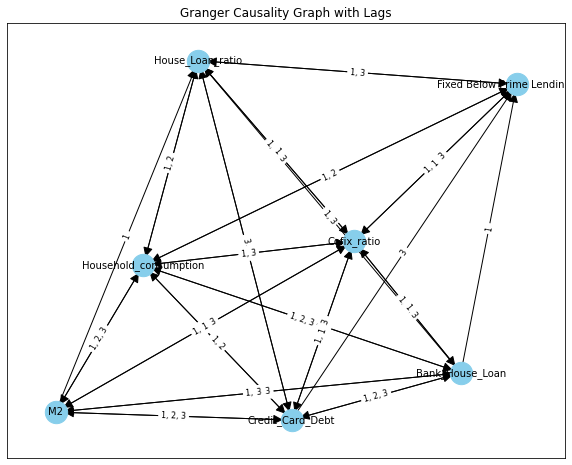

In [92]:
# 그렌저 인과관계 테스트 수행 후 차수와 p-값을 함께 저장
def granger_causality(df, max_lag):
    causality_info = {}
    for variable1 in df.columns:
        for variable2 in df.columns:
            if variable1 != variable2:
                result = sm.tsa.stattools.grangercausalitytests(df[[variable1, variable2]], max_lag, verbose=False)
                for lag in range(1, max_lag + 1):
                    p_value = result[lag][0]['ssr_chi2test'][1]
                    if p_value < 0.05:
                        if (variable1, variable2) not in causality_info:
                            causality_info[(variable1, variable2)] = []
                        causality_info[(variable1, variable2)].append(lag)
    return causality_info

# 그래프 그리기
def draw_causality_graph(causality_info):
    G = nx.DiGraph()
    edge_labels = {}
    for (var1, var2), lags in causality_info.items():
        G.add_edge(var1, var2)
        edge_labels[(var1, var2)] = ", ".join(str(lag) for lag in lags)
    
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 8))
    
    # Node와 Edge를 직접 그리는 코드 추가
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
    nx.draw_networkx_edges(G, pos, arrowsize=20)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5, font_size=8)
    
    plt.title('Granger Causality Graph with Lags')
    plt.show()

causality_info = granger_causality(df2, max_lag)
draw_causality_graph(causality_info)

In [103]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.var_model import VAR

def granger_causality(dataframe, max_lag):
    columns = dataframe.columns
    model = VAR(dataframe).fit(max_lag)
    for col1 in columns:
        for col2 in columns:
            if col1 != col2:
                result = grangercausalitytests(dataframe[[col1, col2]], max_lag, verbose=False)
                for key, value in result.items():
                    p_value = value[0]['ssr_ftest'][1]
                    if p_value < 0.05:
                        coefficient = model.coefs[key-1][0][1]
                        causality_type = "positively causes" if coefficient > 0 else "negatively causes"
                        print(f"{col1} {causality_type} {col2} at lag {key} with p-value {p_value:.3f}")

granger_causality(df2, 4)

C:\Users\minsu\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


House_Loan_ratio positively causes Fixed Below Prime Lending Rate at lag 3 with p-value 0.004
House_Loan_ratio negatively causes Fixed Below Prime Lending Rate at lag 4 with p-value 0.006
House_Loan_ratio positively causes Credit_Card_Debt at lag 3 with p-value 0.013
House_Loan_ratio negatively causes Credit_Card_Debt at lag 4 with p-value 0.000
House_Loan_ratio positively causes Household_consumption at lag 3 with p-value 0.001
House_Loan_ratio negatively causes Household_consumption at lag 4 with p-value 0.004
House_Loan_ratio positively causes Cofix_ratio at lag 1 with p-value 0.000
House_Loan_ratio negatively causes Cofix_ratio at lag 2 with p-value 0.000
House_Loan_ratio positively causes Cofix_ratio at lag 3 with p-value 0.011
House_Loan_ratio negatively causes Cofix_ratio at lag 4 with p-value 0.022
Fixed Below Prime Lending Rate positively causes House_Loan_ratio at lag 3 with p-value 0.000
Fixed Below Prime Lending Rate negatively causes House_Loan_ratio at lag 4 with p-value 

# 경제학적 분석
1. Cofix Ratio (가계대출을 결정하는 금리)
House_Loan_ratio에 대한 영향: Cofix Ratio가 오르면, 3개월 후의 주택 대출 비율이 영향을 받을 수 있습니다. 즉, 대출 금리의 상승은 집값 상승률에 영향을 미칠 수 있습니다.

Fixed Below Prime Lending Rate에 대한 영향: Cofix Ratio가 오르면, 은행의 대출 리스크도 증가할 가능성이 있습니다. 따라서, 은행의 건전성 지표인 Fixed Below Prime Lending Rate에도 영향을 미칠 수 있습니다.

M2에 대한 영향: Cofix Ratio의 변화는 국내 총 통화량(M2)에도 영향을 미칠 수 있습니다. 대출 금리의 상승은 투자와 소비를 억제할 수 있어, 통화량에 변동이 생길 수 있습니다.

Credit_Card_Debt에 대한 영향: Cofix Ratio의 상승은 신용 카드 부채의 증가로 이어질 수 있습니다. 대출 금리가 높아지면, 소비자들은 신용 카드로 지출을 늘릴 가능성이 있기 때문입니다.

Bank_House_Loan에 대한 영향: Cofix Ratio가 오르면, 은행의 주택 대출 규모에도 변동이 생길 수 있습니다. 대출 금리의 상승은 주택 대출을 줄이는 효과를 가져올 수 있습니다.

2. Fixed Below Prime Lending Rate (고정이하여신비율)
House_Loan_ratio에 대한 영향: 은행의 건전성 지표가 변화하면, 주택 대출 비율에도 영향을 미칠 수 있습니다. 은행의 대출 리스크가 높아지면, 대출 규모나 조건에 변화가 생길 수 있습니다.

Credit_Card_Debt에 대한 영향: 은행의 건전성 지표가 변화하면, 신용 카드 부채의 규모에도 영향을 미칠 수 있습니다. 은행의 대출 리스크가 높아지면, 신용 카드 발급 조건이나 한도에 변화가 생길 수 있습니다.

Household_consumption에 대한 영향: 은행의 건전성 지표가 나빠지면, 가계 소비가 감소할 가능성이 있습니다. 대출 조건이나 금리의 변동은 소비자들의 소비 패턴에 영향을 미칠 수 있습니다.

Cofix_ratio에 대한 영향: 은행의 건전성 지표와 Cofix Ratio 사이에는 양방향의 영향 관계가 있을 수 있습니다. 은행의 건전성 지표가 나빠지면, 대출 금리를 조절해야 할 필요가 생길 수 있습니다.

3. M2 (통화량)와 다른 변수 간의 관계:
Credit_Card_Debt에 대한 영향: M2가 증가하면 신용 카드 부채의 규모도 증가할 수 있습니다. 총 통화량의 증가는 소비와 대출의 활성화를 의미하며, 이로 인해 신용 카드 사용이 활발해질 수 있습니다.

Bank_House_Loan에 대한 영향: M2의 증가는 은행의 주택 대출 규모에도 영향을 미칠 수 있습니다. 통화량이 많아지면 대출에 대한 수요도 증가할 수 있습니다.

Household_consumption에 대한 영향: M2의 증가는 가계의 소비 활동을 촉진시킬 수 있습니다. 통화량의 확대는 소비 활동의 활성화를 의미합니다.

Cofix_ratio에 대한 영향: M2의 변화는 Cofix 비율에도 영향을 미칠 수 있습니다. 통화량의 변화는 경제 전반의 활동에 영향을 미치며, 이에 따라 Cofix 비율도 조절될 수 있습니다.

4. Credit_Card_Debt와 다른 변수 간의 관계:
주택 대출 비율: 신용 카드 부채의 증가는 주택 대출 비율에 영향을 미칠 수 있습니다. 부채가 많아질수록 주택 대출에 대한 수요가 줄어들 수 있습니다.

기준금리: 신용 카드 부채의 증가는 기준금리의 조정을 가져올 수 있습니다. 부채가 많아질 경우 중앙은행은 금리를 조정하여 경제를 안정화시킬 수 있습니다.

은행 주택 대출: 신용 카드 부채와 은행 주택 대출 사이에는 음의 상관 관계가 있을 수 있습니다. 하나의 부채가 증가하면 다른 부채의 취득이 어려워질 수 있습니다.

가계 소비: 신용 카드 부채의 증가는 가계 소비를 제한할 수 있습니다. 부채 상환 부담으로 인해 소비가 줄어들 수 있습니다.

Cofix 비율: 신용 카드 부채의 증가는 Cofix 비율에 영향을 미칠 수 있습니다. 부채의 증가는 금융 시장의 불안정성을 높일 수 있으며, 이에 따라 Cofix 비율에 변동이 있을 수 있습니다.